In [1]:
#Neural
import pandas as pd
df = pd.read_csv('housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [2]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [3]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [4]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [6]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

2022-02-15 15:54:08.654358: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-15 15:54:08.654380: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Epoch 1/100


2022-02-15 15:54:10.477714: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-15 15:54:10.477743: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-15 15:54:10.477759: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Z238-UL): /proc/driver/nvidia/version does not exist
2022-02-15 15:54:10.477933: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


32/32 [==============================] - 1s 5ms/step - loss: 0.7126 - accuracy: 0.4971 - val_loss: 0.7071 - val_accuracy: 0.5068
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7064 - accuracy: 0.4755 - val_loss: 0.7024 - val_accuracy: 0.4703
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7013 - accuracy: 0.4589 - val_loss: 0.6984 - val_accuracy: 0.4384
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.4344 - val_loss: 0.6947 - val_accuracy: 0.4110
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4305 - val_loss: 0.6912 - val_accuracy: 0.4612
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5176 - val_loss: 0.6878 - val_accuracy: 0.5799
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.5431 - val_loss: 0.6844 - val_accuracy: 0.5571
Epoch 8/100
32/32 [======

Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3534 - accuracy: 0.8777 - val_loss: 0.3392 - val_accuracy: 0.8584
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.8728 - val_loss: 0.3359 - val_accuracy: 0.8584
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3462 - accuracy: 0.8748 - val_loss: 0.3322 - val_accuracy: 0.8630
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3434 - accuracy: 0.8767 - val_loss: 0.3290 - val_accuracy: 0.8721
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3414 - accuracy: 0.8748 - val_loss: 0.3262 - val_accuracy: 0.8721
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3376 - accuracy: 0.8816 - val_loss: 0.3235 - val_accuracy: 0.8630
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3351 - accuracy: 0.8748 - val_loss: 0.3208 - val_accuracy: 0.8676
Epoch 

In [7]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 1ms/step - loss: 0.2743 - accuracy: 0.8858


0.8858447670936584

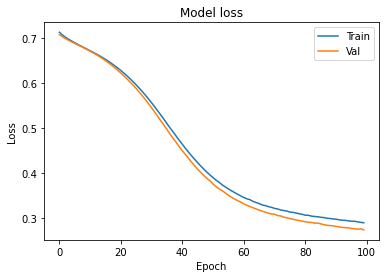

In [8]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [9]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

KeyError: 'acc'